1. Database Setup and Import :

   - Create a MySQL database.
   - Load the provided crime dataset into the MySQL database.

     

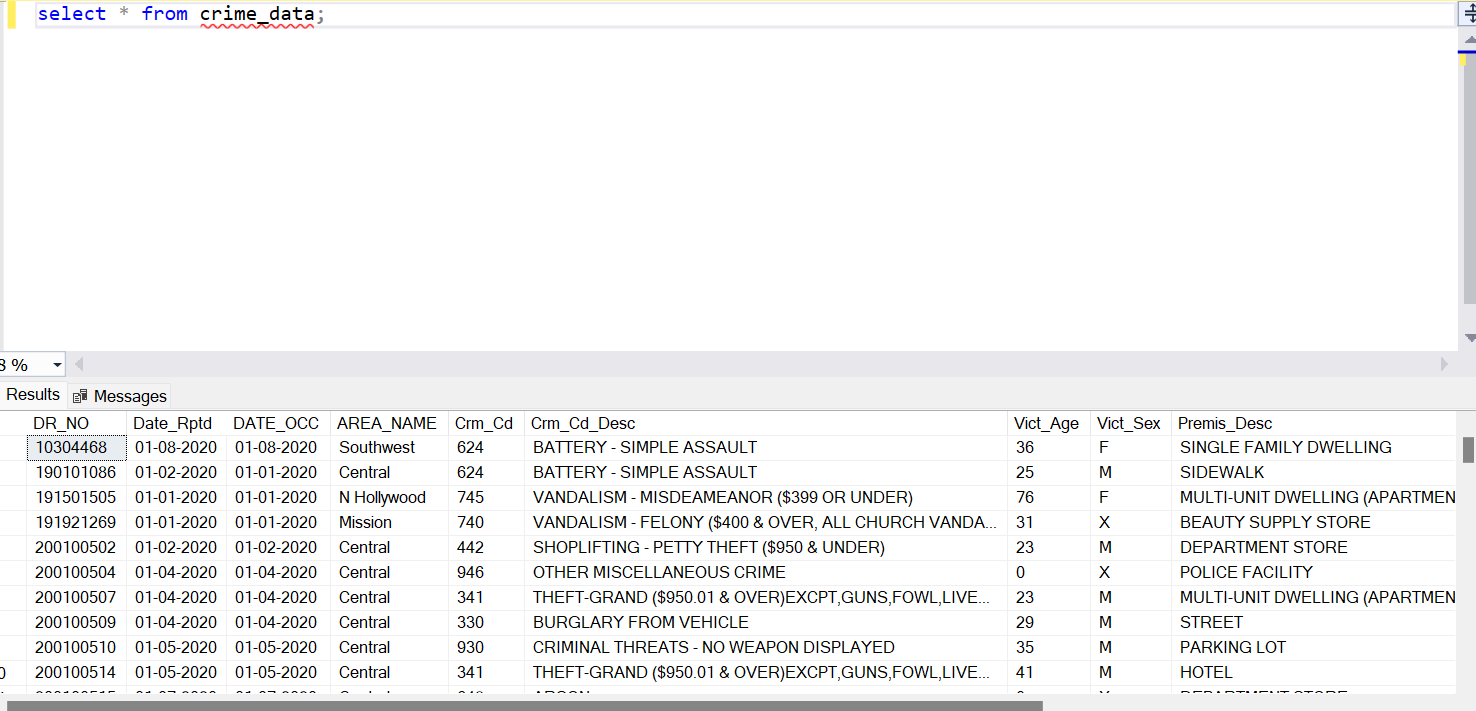

In [44]:
# importing all required libraries
import pandas as pd
import pyodbc
import pymysql
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


2. Database Connection :

   - Use PyMySQL to establish a connection to the database in Pycharm or VS code.
   - Verify the successful import of data in pycharm.

In [46]:
#connecting with SQL database
conn=pyodbc.connect(driver='{SQL Server}', host = 'LAPTOP-C2ROQAFJ\SQLEXPRESS', database='master',Trusted_Connection='yes')

In [47]:
# query to pull all the data
query_all_data="Select * from crime_data;"
df=pd.read_sql(query_all_data,conn)

In [4]:
df

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.3
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.4
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25



3. Data Exploration:

   - Retrieve basic statistics on the dataset, such as the total number of records and unique values in specific columns.

   - Identify the distinct crime codes and their descriptions.


In [5]:
# To find the total records, no of rows and columns.
df.shape

(499, 13)

In [13]:
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd', 'Crm_Cd_Desc',
       'Vict_Age', 'Vict_Sex', 'Premis_Desc', 'Status', 'Location', 'LAT',
       'LON'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DR_NO        499 non-null    int32         
 1   Date_Rptd    499 non-null    datetime64[ns]
 2   DATE_OCC     499 non-null    datetime64[ns]
 3   AREA_NAME    499 non-null    object        
 4   Crm_Cd       499 non-null    object        
 5   Crm_Cd_Desc  499 non-null    object        
 6   Vict_Age     499 non-null    int32         
 7   Vict_Sex     499 non-null    object        
 8   Premis_Desc  499 non-null    object        
 9   Status       499 non-null    object        
 10  Location     499 non-null    object        
 11  LAT          499 non-null    float64       
 12  LON          499 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int32(2), object(7)
memory usage: 46.9+ KB


In [48]:
# converting data types
df = df.astype({
    'DR_NO': int,
    'Date_Rptd': 'datetime64[ns]',
    'DATE_OCC': 'datetime64[ns]',
    'Vict_Age': int,
    'LAT': float,
    'LON':float
})

In [50]:
# Retrieving basic statiscal data
df.describe()

,DR_NO,Date_Rptd,DATE_OCC,Vict_Age,LAT,LON
count,4.990000e+02,499,499,499.000000,499.000000,499.000000
mean,1.999930e+08,2020-02-13 21:15:30.661322752,2020-02-07 00:25:58.316633344,32.142285,34.047335,-118.261283
min,1.030447e+07,2020-01-01 00:00:00,2020-01-01 00:00:00,0.000000,33.710000,-118.560000
25%,2.001044e+08,2020-01-06 00:00:00,2020-01-05 00:00:00,23.000000,34.040000,-118.260000
50%,2.001048e+08,2020-01-11 00:00:00,2020-01-10 00:00:00,31.000000,34.050000,-118.250000
75%,2.001064e+08,2020-02-03 00:00:00,2020-02-03 00:00:00,46.500000,34.050000,-118.240000
max,2.220130e+08,2022-08-06 00:00:00,2020-12-12 00:00:00,78.000000,34.280000,-118.190000
std,8.742243e+06,NaN,NaN,20.202136,0.053840,0.041560


In [17]:
# total distinct crime codes
total_distinct_crime_codes = df['Crm_Cd'].unique().size
distinct_crime_codes=df['Crm_Cd'].unique()
print(f"Distinct crime codes ({total_distinct_crime_codes}): {distinct_crime_codes}")


Distinct crime codes (42): ['624' '745' '740' '442' '946' '341' '330' '930' '648' '354' '230' '761'
 '350' '310' '480' '623' '440' '510' '210' '900' '888' '420' '886' '421'
 '647' '940' '662' '220' '625' '755' '649' '901' '320' '890' '351' '956'
 '820' '812' '920' '850' '666' '343']


In [18]:
crime_code_details = 'select distinct crm_cd,crm_cd_desc  from crime_data;'
df_crime_code_details=pd.read_sql(crime_code_details,conn)
df_crime_code_details

,crm_cd,crm_cd_desc
0,210,ROBBERY
1,220,ATTEMPTED ROBBERY
2,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"
3,310,BURGLARY
4,320,"BURGLARY, ATTEMPTED"
5,330,BURGLARY FROM VEHICLE
6,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
7,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER)
8,350,"THEFT, PERSON"
9,351,PURSE SNATCHING


In [19]:
# distinct premises description
distinct_premises_description=df['Premis_Desc'].value_counts()
print(f"distinct premises description: {distinct_premises_description}")

distinct premises description: Premis_Desc
STREET                                          105
SIDEWALK                                         62
PARKING LOT                                      46
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     45
SINGLE FAMILY DWELLING                           25
                                               ... 
MINI-MART                                         1
SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS      1
MEDICAL/DENTAL OFFICES                            1
DETENTION/JAIL FACILITY                           1
MTA PROPERTY OR PARKING LOT                       1
Name: count, Length: 67, dtype: int64


In [22]:
distinct_status=df['Status'].unique()
print(f"distinct status: {distinct_status}")


distinct status: ['AO' 'IC' 'AA' 'JO']


In [6]:
df.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.3
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.4
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


4. Temporal Analysis:

   - Analyze the temporal aspects of the data.

   - Determine trends in crime occurrence over time.

In [8]:
# Convert date columns to datetime
df['Date_Rptd'] = pd.to_datetime(df['Date_Rptd'], format='%m-%d-%Y')
df['DATE_OCC'] = pd.to_datetime(df['DATE_OCC'], format='%m-%d-%Y')

# Extract year, month, and day of the week for analysis
df['Year'] = df['DATE_OCC'].dt.year
df['Month'] = df['DATE_OCC'].dt.month
df['DayOfWeek'] = df['DATE_OCC'].dt.dayofweek

In [18]:
monthly_crime = df.groupby(['Year', 'Month']).size().reset_index(name='CrimeCount')
monthly_crime

,Year,Month,CrimeCount
0,2020,1,314
1,2020,2,130
2,2020,3,4
3,2020,4,5
4,2020,5,5
5,2020,6,6
6,2020,7,3
7,2020,8,3
8,2020,9,5
9,2020,10,4


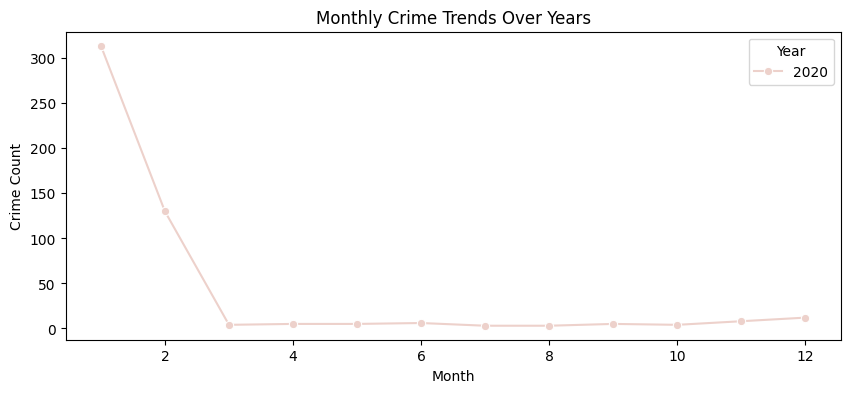

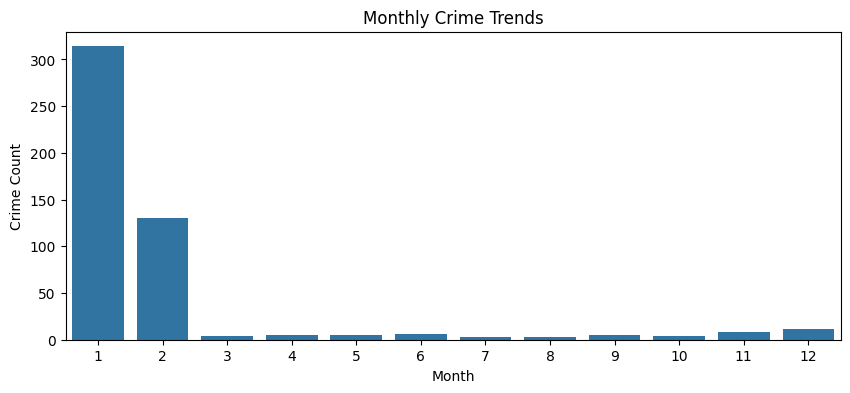

In [24]:
# Line graph for monthly crime trends
plt.figure(figsize=(10, 4))
sns.lineplot(x='Month', y='CrimeCount', hue='Year', data=monthly_crime, marker='o')
plt.title('Monthly Crime Trends Over Years')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.legend(title='Year')
plt.show()

# Bar graph for yearly crime trends
Month_crime = df.groupby('Month').size().reset_index(name='CrimeCount')
plt.figure(figsize=(10, 4))
sns.barplot(x='Month', y='CrimeCount', data=Month_crime)
plt.title('Monthly Crime Trends')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.show()


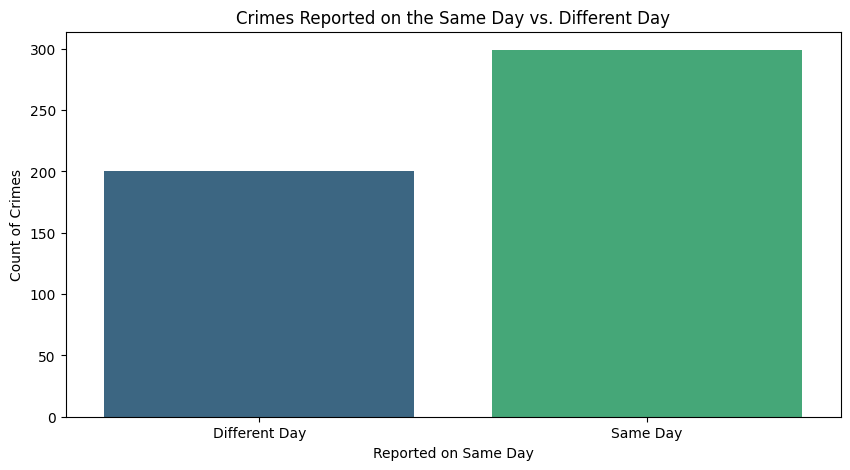

In [25]:
# Create a new column to indicate if the crime was reported on the same day it occurred
df['Same_Day_Report'] = df['Date_Rptd'] == df['DATE_OCC']

# Count the occurrences
same_day_count = df['Same_Day_Report'].value_counts().reset_index()
same_day_count.columns = ['Same_Day_Report', 'Count']

# Bar chart for same day report
plt.figure(figsize=(10, 5))
sns.barplot(x='Same_Day_Report', y='Count', data=same_day_count, palette='viridis')
plt.title('Crimes Reported on the Same Day vs. Different Day')
plt.xlabel('Reported on Same Day')
plt.ylabel('Count of Crimes')
plt.xticks([0, 1], ['Different Day', 'Same Day'])
plt.show()

5. Spatial Analysis:

   - Utilize the geographical information (Latitude and Longitude) to perform spatial analysis.

   - Visualize crime hotspots on a map.

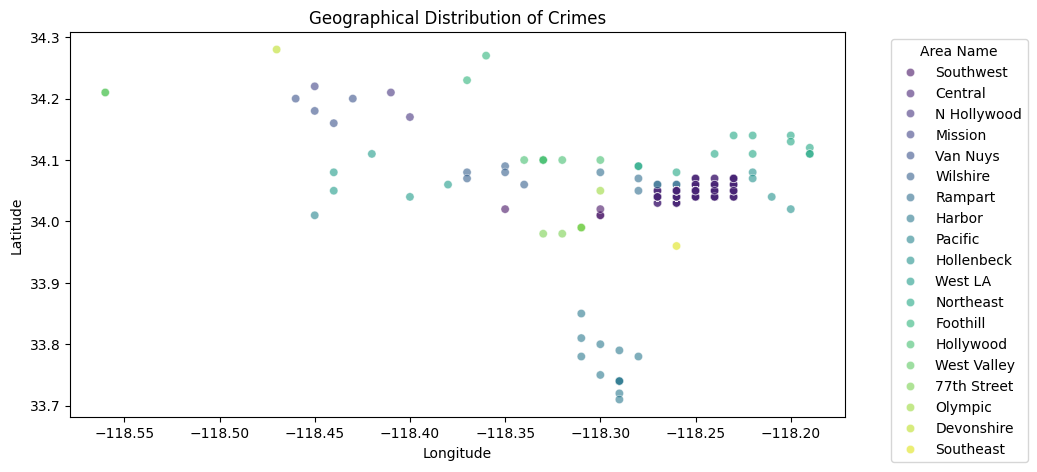

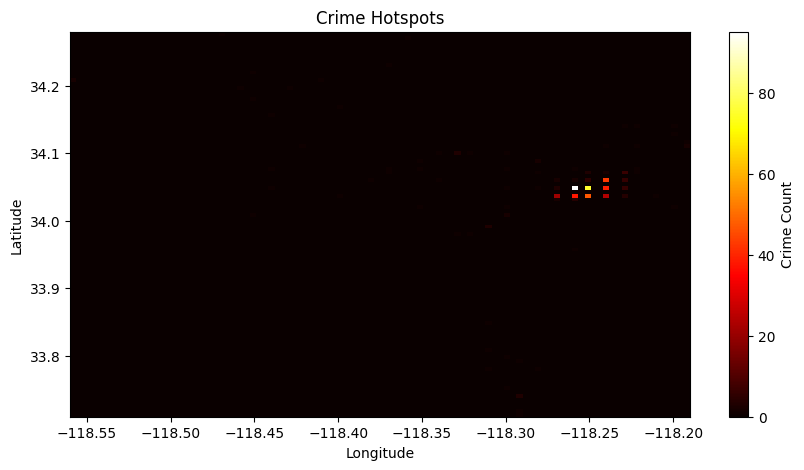

In [27]:
# Ensure latitude and longitude are numeric
df['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
df['LON'] = pd.to_numeric(df['LON'], errors='coerce')


# Scatter plot for geographical distribution
plt.figure(figsize=(10, 5))
sns.scatterplot(x='LON', y='LAT', data=df, hue='AREA_NAME', palette='viridis', alpha=0.6)
plt.title('Geographical Distribution of Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Area Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Heatmap for crime hotspots
plt.figure(figsize=(10, 5))

# Create a 2D histogram for the heatmap
heatmap_data, xedges, yedges = np.histogram2d(df['LON'], df['LAT'], bins=(100, 100))

# Plot the heatmap
plt.imshow(heatmap_data.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='hot', aspect='auto')
plt.colorbar(label='Crime Count')
plt.title('Crime Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


6. Victim Demographics:

   - Investigate the distribution of victim ages and genders.

   - Identify common premises descriptions where crimes occur.

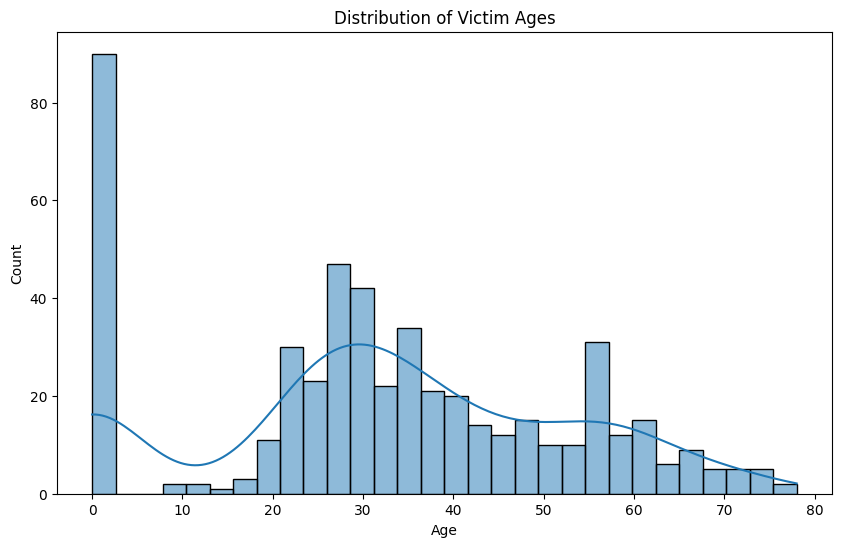

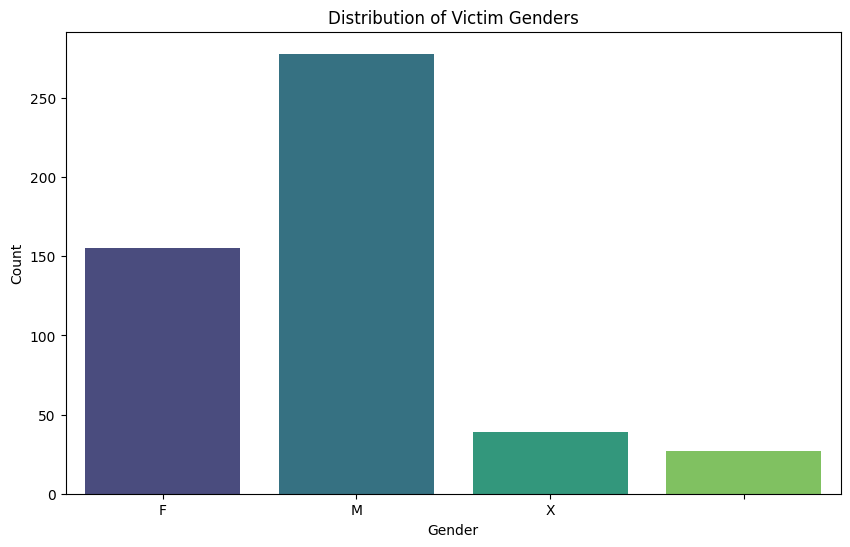

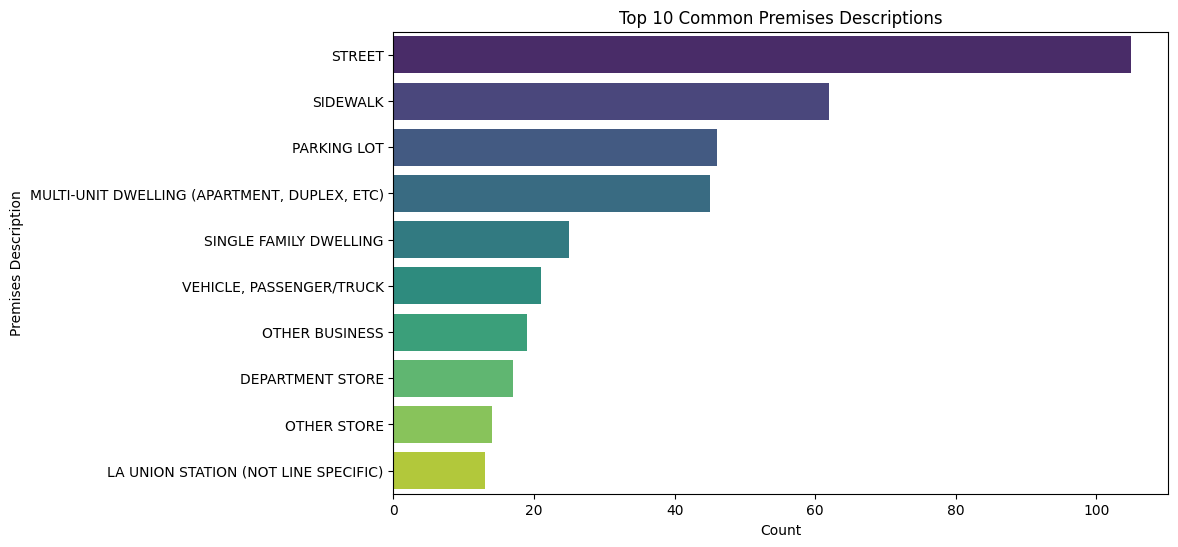

In [28]:
# Ensure victim age is numeric
df['Vict_Age'] = pd.to_numeric(df['Vict_Age'], errors='coerce')

# Investigate the Distribution of Victim Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Vict_Age'], bins=30, kde=True)
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Investigate the Distribution of Victim Genders
plt.figure(figsize=(10, 6))
sns.countplot(x='Vict_Sex', data=df, palette='viridis')
plt.title('Distribution of Victim Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Identify Common Premises Descriptions
plt.figure(figsize=(10, 6))
common_premises = df['Premis_Desc'].value_counts().head(10)
sns.barplot(x=common_premises.values, y=common_premises.index, palette='viridis')
plt.title('Top 10 Common Premises Descriptions')
plt.xlabel('Count')
plt.ylabel('Premises Description')
plt.show()


7. Status Analysis:

   - Examine the status of reported crimes.

   - Classify crimes based on their current status.

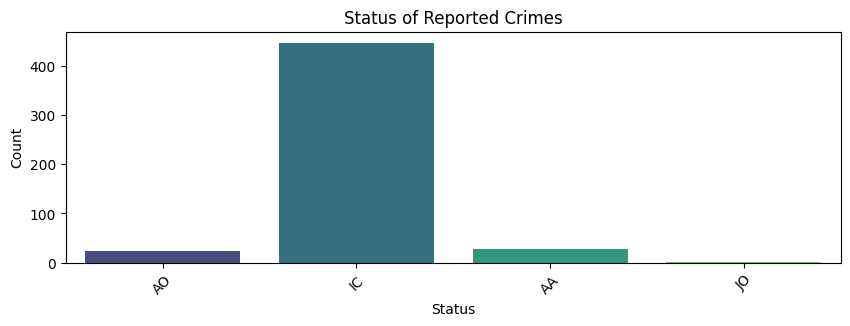

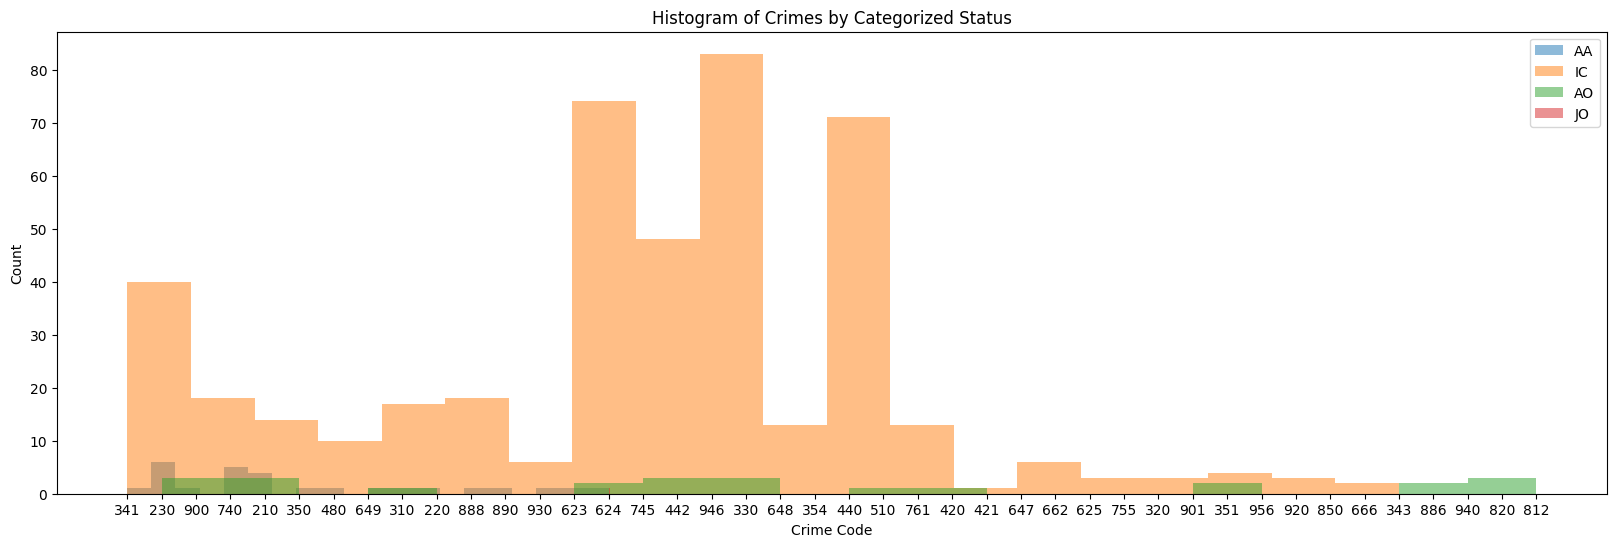

In [54]:
# Examine the Status of Reported Crimes
plt.figure(figsize=(10, 3))
sns.countplot(x='Status', data=df, palette='viridis')
plt.title('Status of Reported Crimes')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Classify Crimes Based on Current Status
status_categories = ['AA', 'IC', 'AO', 'JO']

# Create a new column 'Status Category' based on these categories
df['Status Category'] = pd.Categorical(df['Status'], categories=status_categories, ordered=True)
common_premises = df['Crm_Cd'].value_counts().head(10)

# Plot Histograms for Categorized Status
plt.figure(figsize=(20, 6))

# Iterate through each status category and plot a histogram
for i, status in enumerate(status_categories):
    plt.hist(df[df['Status Category'] == status]['Crm_Cd'], bins=20, alpha=0.5, label=status)

plt.title('Histogram of Crimes by Categorized Status')
plt.xlabel('Crime Code')
plt.ylabel('Count')
plt.legend()
plt.show()

